# Regression

[Linear Regression](https://app.pluralsight.com/ilx/video-courses/clips/f5e161f8-060a-40ea-b279-4db7b456bdcd)

[Setting up a regrerssion problem](https://app.pluralsight.com/ilx/video-courses/4b4cdb5a-b0b9-4c17-8e5c-9d9e07e522a0/38be9250-ced7-4d6c-a6e8-aa0fa9a1bf9b/86eb9537-19f4-4a08-b10e-96069e890043)

## The quality of a Linear Regression

R^2 = ESS / TSS = Explained Sum of Squares / Total Sum of Squares = Fitted Variance / Total Vatiance

ESS measures the variance of the fitted values.  
TSS measures the variance of the data values to fit with a linear model.   
R^2 is the proportion of the TTS that is **explained** by the linear regression.

## The Adjusted R^2 for multiple regression

aR^2 = R^2 * (Penalty for adding irrelevant variables)  

**Irrelevant variables** are defined as any group whose **F-Ratio** is lower than 1.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style='darkgrid')

https://www.kaggle.com/datasets/shaistashaikh/carprice-assignment

In [3]:
car_data = pd.read_csv('datasets/CarPrice_Assignment.csv')

In [4]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Explore the distribution of the Price variable from this dataset.

C:\Users\pb00270\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


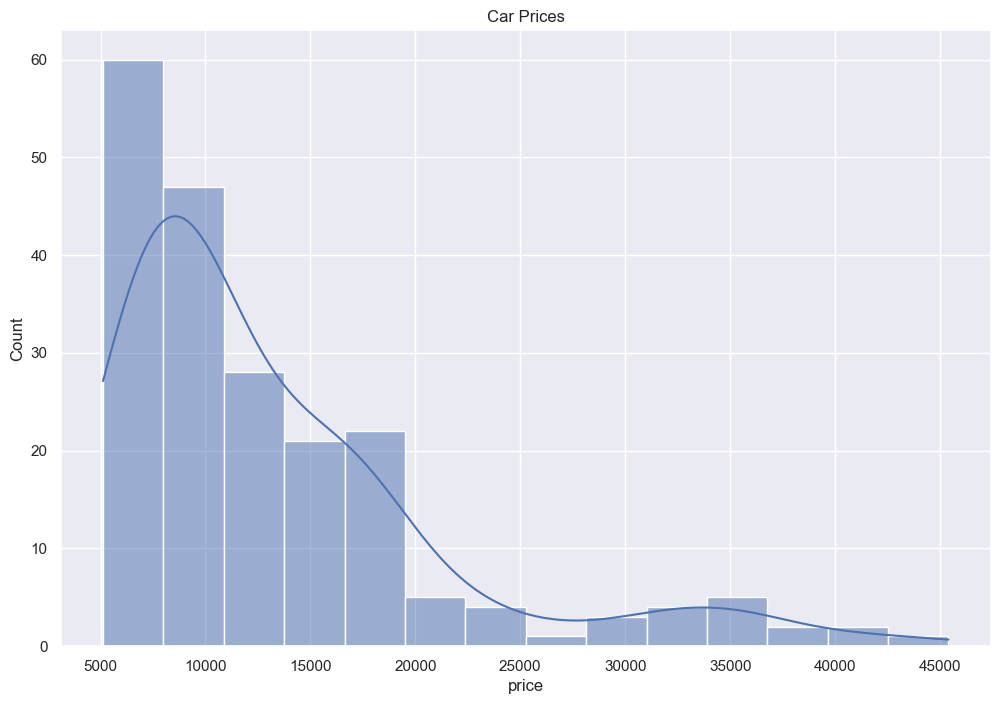

In [5]:
plt.figure(figsize=(12,8))
plt.title('Car Prices')
sns.histplot(data=car_data,x='price',kde=True)
plt.show()

We inspect whether it is possible that the type of fuel has an influence over the price of a car.

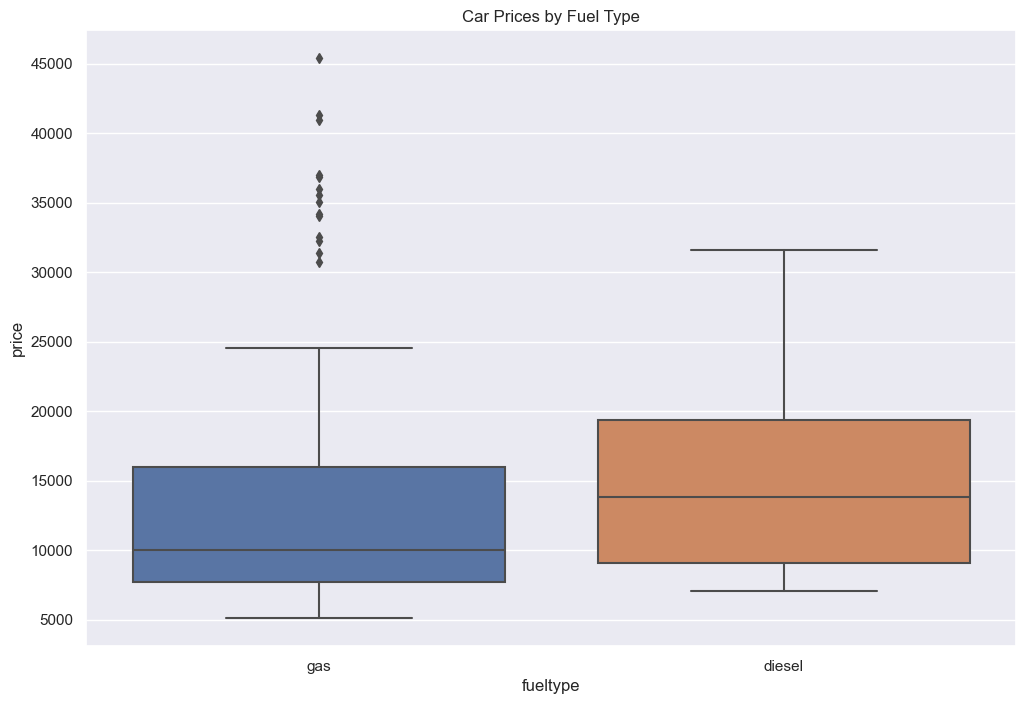

In [6]:
plt.figure(figsize=(12,8))
plt.title('Car Prices by Fuel Type')
sns.boxplot(data=car_data,x='fueltype',y='price')
plt.show()

We inspect whether it is possible that the drivewheel as an influence over the price of a car.

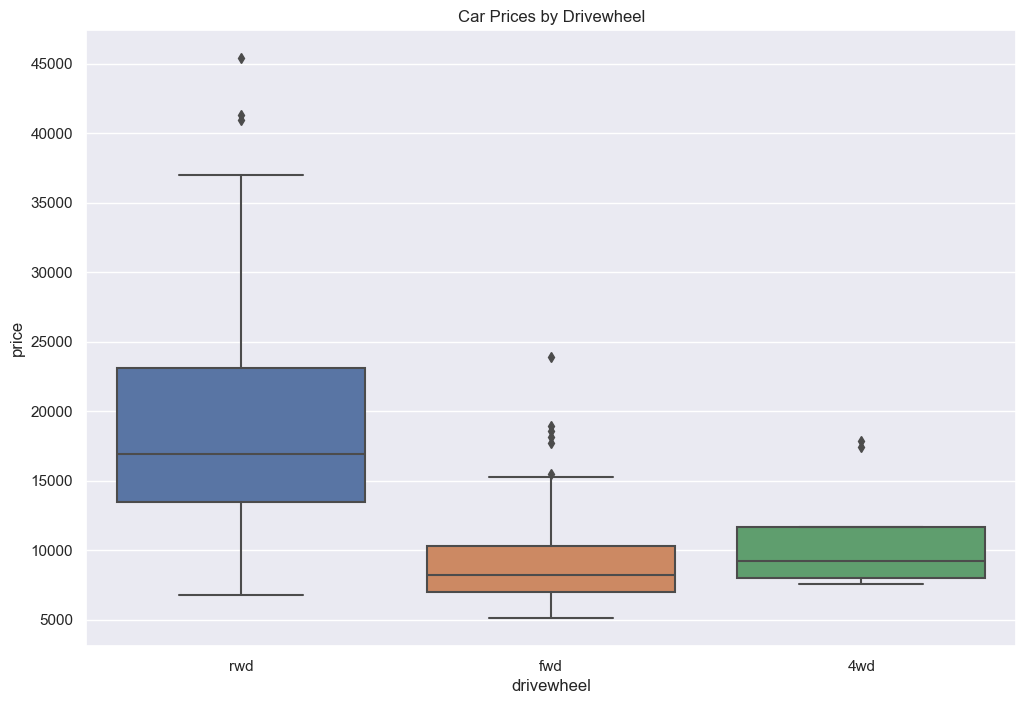

In [7]:
plt.figure(figsize=(12,8))
plt.title('Car Prices by Drivewheel')
sns.boxplot(data=car_data,x='drivewheel',y='price')
plt.show()

We inspect whether horsepower may influence the price of a car.
For this a **scatter plot** is most suitable.

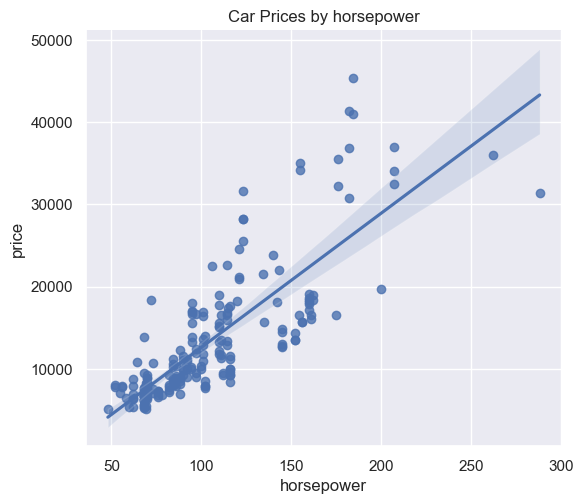

In [8]:
sns.lmplot(data=car_data,x='horsepower',y='price',height=5, aspect=1.2)
plt.title('Car Prices by horsepower')
plt.show()

# Performing Regression Analysis

reshuffle the dataset to make sure that the regression analysis is not going to be affected by any pattern arising from the data being pre-sorted in the original dataset.

In [10]:
car_data = car_data.sample(frac=1).reset_index(drop=True)
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,136,2,saab 99gle,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.3,110,5250,21,28,15510.0
1,26,1,dodge colt hardtop,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
2,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0
3,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
4,171,2,toyota tercel,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,11199.0


The regression analysis in this case investigate whether there may be a linear correlation between the variable horsepower and the variable price in the dataset.

In [11]:
x = car_data['horsepower']
y = car_data['price']

In [13]:
x = sm.add_constant(x)
x.head()

,const,horsepower
0,1.0,110
1,1.0,68
2,1.0,123
3,1.0,155
4,1.0,116


In [ ]:
train_size = int(0.8 * len(x))

x_train_set = x(:train_size)
y_train_set = y(:train_size)

x_test_set = x(train_size:)
y_test_set = y(train_size:)